<a href="https://colab.research.google.com/github/barrylunemann/dairy-analysis/blob/master/Dairy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
consumption = pd.read_csv("/content/drive/MyDrive/Dairy Analysis/Milk_Consumption.csv")
cow_data = pd.read_csv("/content/drive/MyDrive/Dairy Analysis/Animal_History.csv")

In [ ]:
consumption

,Unnamed: 0,ID,Tag,ID.1,Calf,Date,TAG,Should,Should_RM,Amount_Drank,...,KF2_SOLL,KF1_SOLL_RM,KF2_SOLL_RM,ZU_PU_REZEPT,ZU_FL_REZEPT,ZU_PU,ZU_FL,ELEKTROLYT,ELEK_PRO_BESUCH,KONZ_SOLL
0,0,101,5,101,101,12/23/2011,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
1,1,102,10,102,102,12/23/2011,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2,2,103,6,103,103,12/23/2011,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
3,3,104,20,104,104,12/23/2011,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
4,4,105,4,105,105,12/23/2011,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268384,268384,6171,8214,268497,6171,10/19/2019,22,8.0,10.0,4.6,...,0,0,0,0,0,0,0,0,0.0,150
268385,268385,6172,8226,268498,6172,10/19/2019,22,8.0,10.0,4.1,...,0,0,0,0,0,0,0,0,0.0,150
268386,268386,6173,8221,268499,6173,10/19/2019,22,8.0,9.9,4.3,...,0,0,0,0,0,0,0,0,0.0,150
268387,268387,6174,8220,268500,6174,10/19/2019,22,8.0,10.0,4.2,...,0,0,0,0,0,0,0,0,0.0,150


In [ ]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268389 entries, 0 to 268388
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     268389 non-null  int64  
 1   ID                             268389 non-null  int64  
 2   Tag                            268389 non-null  int64  
 3   ID.1                           268389 non-null  int64  
 4   Calf                           268389 non-null  int64  
 5   Date                           268389 non-null  object 
 6   TAG                            268389 non-null  int64  
 7   Should                         268389 non-null  float64
 8   Should_RM                      268389 non-null  float64
 9   Amount_Drank                   268389 non-null  float64
 10  Amount_Drank_PR                268389 non-null  int64  
 11  Suction                        268389 non-null  int64  
 12  Suction_PR                    

In [ ]:
print(consumption.loc[:, 'Amount_Drank_PR'].mean())
print(consumption.loc[:, 'Amount_Drank_PR'].max())
print(consumption.loc[:, 'Amount_Drank_PR'].min())

83.04303455059633
255
0


In [ ]:
consumption_group = consumption.loc[:, ['Tag', 'Should',
                                        'Should_RM', 'Amount_Drank', 'Amount_Drank_PR', 'Suction', 'Suction_PR',
                                        'Cancellation_Without_Addition', 'Cancellation_With_addition',
                                        'Visit_Without_Drinking', 'Visit_With_Drinking', 'Weight',
                                        'Weight_Change', 'GEWICHT_MAN', 'KF1_ABRUF', 'KF2_ABRUF', 'KF1_SOLL',
                                        'KF2_SOLL', 'KF1_SOLL_RM', 'KF2_SOLL_RM', 'ZU_PU_REZEPT',
                                        'ZU_FL_REZEPT', 'ZU_PU', 'ZU_FL', 'ELEKTROLYT', 'ELEK_PRO_BESUCH',
                                        'KONZ_SOLL']]
consumption_group = consumption_group.groupby('Tag', as_index=False).sum()
consumption_group.sort_values('Amount_Drank', ascending=False, inplace=True)
consumption_group.rename({'Tag': 'Number'}, inplace=True, axis=1)

                                    

In [ ]:
consumption_group = consumption_group[consumption_group.Amount_Drank > 0]
consumption_group

,Number,Should,Should_RM,Amount_Drank,Amount_Drank_PR,Suction,Suction_PR,Cancellation_Without_Addition,Cancellation_With_addition,Visit_Without_Drinking,...,KF2_SOLL,KF1_SOLL_RM,KF2_SOLL_RM,ZU_PU_REZEPT,ZU_FL_REZEPT,ZU_PU,ZU_FL,ELEKTROLYT,ELEK_PRO_BESUCH,KONZ_SOLL
179,184,943.7,1011.6,847.7,12355,116230,14271,260,0,1121,...,0,0,0,0,0,0,0,0,0.0,18945
180,185,943.7,1036.0,817.7,10738,108204,13268,107,0,677,...,0,0,0,0,0,0,0,0,0.0,18405
143,148,1016.0,1201.7,729.3,8176,89115,12927,443,0,352,...,0,0,0,0,0,0,0,0,4.5,19200
105,108,764.4,859.7,663.2,9700,67092,12123,136,0,508,...,0,0,0,0,0,0,0,0,0.0,17700
159,164,775.2,883.9,638.2,9043,84688,11998,139,0,280,...,0,0,0,0,0,0,0,0,0.0,16440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,581,22.0,25.0,0.5,8,0,300,1,0,0,...,0,0,0,0,0,0,0,0,0.0,450
2630,5408,22.0,25.0,0.3,5,0,300,1,0,0,...,0,0,0,0,0,0,0,0,0.0,450
3255,6049,48.0,55.5,0.2,3,0,600,1,0,0,...,0,0,0,0,0,0,0,0,0.0,900
3962,6782,72.0,84.0,0.1,1,0,900,2,0,0,...,0,0,0,0,0,0,0,0,0.0,1350


In [ ]:
cow_cleaned = cow_data.loc[:, ['OID', 'Number', 'BirthDate', 'ExitDate', 'CullDecisionDate']]

In [ ]:
cow_cleaned['BirthDate'] = pd.to_datetime(cow_cleaned['BirthDate'], errors='coerce')
cow_cleaned['ExitDate'] = pd.to_datetime(cow_cleaned['ExitDate'], errors='coerce')
cow_cleaned['CullDecisionDate'] = pd.to_datetime(cow_cleaned['CullDecisionDate'], errors='coerce')
cow_cleaned['Years'] = cow_cleaned.apply(lambda row:
                                         10
                                         if pd.isnull(row['ExitDate'])
                                         else 
                                         (row['ExitDate'] - row['BirthDate']).total_seconds()/31536000,
                                         axis=1)

cow_cleaned


,OID,Number,BirthDate,ExitDate,CullDecisionDate,Years
0,2,73,2011-06-18,2016-10-19 10:01:10.767,NaT,5.343610
1,3,127,2010-07-19,2017-02-27 17:03:50.663,NaT,6.618386
2,4,143,2011-10-30,2017-02-27 17:03:51.093,2016-06-08,5.336195
3,5,149,2012-05-14,2017-01-18 17:22:21.813,NaT,4.686915
4,6,158,2013-09-21,2017-06-28 11:18:05.967,NaT,3.771153
...,...,...,...,...,...,...
3480,8453,6020,2015-06-13,NaT,NaT,10.000000
3481,8454,6023,2015-06-13,NaT,NaT,10.000000
3482,8455,6553,2016-07-20,NaT,NaT,10.000000
3483,8456,6561,2016-07-27,NaT,NaT,10.000000


In [ ]:
final_data = pd.merge(consumption_group, cow_cleaned, on='Number', how='left')
final_data = final_data.loc[:, ['Number', 'Years', 'BirthDate', 'ExitDate', 'CullDecisionDate',
                                'Should', 'Should_RM', 'Amount_Drank', 'Amount_Drank_PR',
                                'Suction', 'Suction_PR', 'Cancellation_Without_Addition',
                                'Cancellation_With_addition', 'Visit_Without_Drinking',
                                'Visit_With_Drinking', 'Weight', 'Weight_Change', 'GEWICHT_MAN',
                                'KF1_ABRUF', 'KF2_ABRUF', 'KF1_SOLL', 'KF2_SOLL', 'KF1_SOLL_RM',
                                'KF2_SOLL_RM', 'ZU_PU_REZEPT', 'ZU_FL_REZEPT', 'ZU_PU', 'ZU_FL',
                                'ELEKTROLYT', 'ELEK_PRO_BESUCH', 'KONZ_SOLL', 'OID']]
final_data.iloc[:, 0:20][pd.isnull(final_data.Years) == False]

,Number,Years,BirthDate,ExitDate,CullDecisionDate,Should,Should_RM,Amount_Drank,Amount_Drank_PR,Suction,Suction_PR,Cancellation_Without_Addition,Cancellation_With_addition,Visit_Without_Drinking,Visit_With_Drinking,Weight,Weight_Change,GEWICHT_MAN,KF1_ABRUF,KF2_ABRUF
5,149,4.686915,2012-05-14,2017-01-18 17:22:21.813,NaT,764.4,874.1,637.7,10185,60065,12783,326,0,362,624,10083.6,111563,0,0,0
6,149,5.258132,2012-05-14,2017-08-15 05:14:10.877,NaT,764.4,874.1,637.7,10185,60065,12783,326,0,362,624,10083.6,111563,0,0,0
17,179,2.571892,2015-03-02,2017-09-25 17:46:38.050,NaT,671.0,748.6,575.0,7565,61130,9545,131,0,404,420,7167.2,79267,0,0,0
28,165,2.929707,2014-01-10,2016-12-14 08:14:07.497,NaT,722.4,816.7,555.7,9459,59319,12161,194,0,418,466,9174.5,101113,0,0,0
29,165,3.443651,2014-01-10,2017-06-19 22:22:55.670,2017-06-12,722.4,816.7,555.7,9459,59319,12161,194,0,418,466,9174.5,101113,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,6551,2.713646,2016-07-17,2019-04-03 11:32:16.093,NaT,305.7,369.6,161.1,2502,41177,4717,12,0,68,99,3581.4,39603,0,0,0
6739,6551,10.000000,2016-07-17,NaT,NaT,305.7,369.6,161.1,2502,41177,4717,12,0,68,99,3581.4,39603,0,0,0
6770,4522,4.612185,2011-11-20,2016-06-29 10:44:24.080,NaT,209.0,242.8,127.2,9373,16633,10511,82,0,123,125,9300.3,103230,0,0,0
6771,4522,5.973977,2011-11-20,2017-11-08 12:02:23.080,NaT,209.0,242.8,127.2,9373,16633,10511,82,0,123,125,9300.3,103230,0,0,0


In [ ]:
mapping_x = 'Years'
# mapping_y = 'Visit_Without_Drinking'
mapping_y = 'Amount_Drank'
for_map = final_data[final_data.Years != 10]
for_map = for_map[pd.isnull(for_map.Years) == False]
b, a = np.polyfit(for_map.loc[:, mapping_x].values,
                  for_map.loc[:, mapping_y].values,
                  deg=1)
xseq = np.linspace(0, 10, num=11)

In [ ]:
b, a

(-0.05895819425656039, 266.3692499640335)

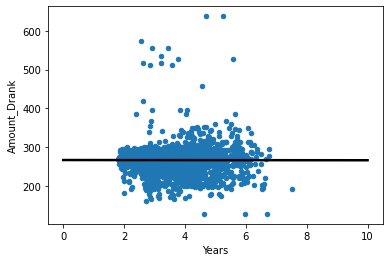

In [ ]:

ax = for_map.plot(x =mapping_x, y=mapping_y, kind = 'scatter')
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.show()

In [ ]:
for_map.loc[:, mapping_x].values


array([4.68691469, 5.258132  , 2.57189238, ..., 4.61218493, 5.97397714,
       6.69816644])